In [1]:
from maelzel.core import *
import csoundengine as ce
import pitchtools as pt
from maelzel.snd.audiosample import Sample

In [2]:
setScoreStruct(r'''
    4/4, 60
    4/4, 120
''')

Clip(source=../snd/piano-pitchtest-Cmaj.flac, numChannels=1, sr=44100, dur=1186337243678751/70368744177664, sourcedursecs=10.429secs)
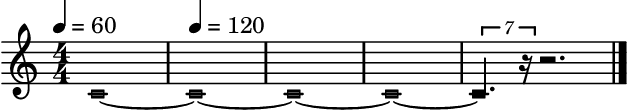

In [3]:
cl = Clip("../snd/piano-pitchtest-Cmaj.flac", pitch=60, speed=1)
cl

In [4]:
cl.play()




--Csound version 6.19 (double samples) Jan 13 2024
[commit: c53556fbbb69d14554a4a4bd91efa441a1701d70]
libsndfile-1.2.0
sr = 44100.0, kr = 689.062, ksmps = 64
0dBFS level = 1.0, A4 tuning = 442.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Pro: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Pro:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(𝍪 preset:_clip_diskin=501.0002 start=0.802 dur=10.429 p4=0 kpos=1 kgain=21 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=../snd/piano-pitchtest-Cmaj.flac ipath=-1 isndfilechan=1 kspeed=0 iskip=0 iwrap=4 iwinsize=0 p21=60 …)

In [5]:
ev = cl.play()
ev.automate('speed', (0, 0.25, cl.dur, 2))
ev

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(𝍪 preset:_clip_diskin=501.0003 start=12.532 dur=10.429 p4=0 kpos=1 kgain=21 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=../snd/piano-pitchtest-Cmaj.flac ipath=-1 isndfilechan=1 kspeed=0 iskip=0 iwrap=4 iwinsize=0 p21=60 …)

OfflineRenderer(sr=44100)
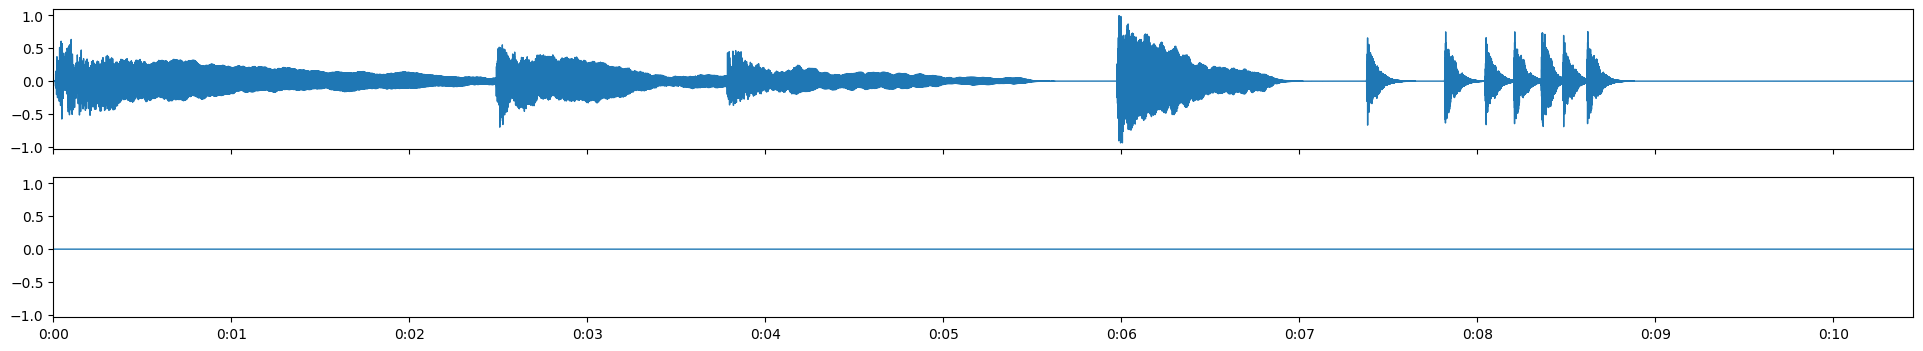

In [6]:
with render(show=True):
    ev = cl.play()
    ev.automate('speed', (0, 0.25, cl.dur*0.5, 2))


In [8]:
# This might result in unsynched playback, see below for the correct way

n = Note("7c", 1)

samp = cl.asSample()

gr1 = n.play(fade=0)
gr2 = cl.play(position=0)
gr2.automate('speed', (0, 1, 2, 0.8, 3, 1))
gr2.set(speed=0.5, delay=4)
sampsynth = samp.play(engine=playSession().engine)
sampsynth.synth.automate('kspeed', (0, 1, 2, 0.8, 3, 1))
sampsynth.synth.set(speed=0.5, delay=4)
    


In [9]:
n = Note("7c", 1)

samp = cl.asSample()

with play() as s:
    gr1 = n.play(fade=0)
    gr2 = cl.play(position=0)
    gr2.automate('speed', (0, 1, 2, 0.8, 3, 1))
    gr2.set(speed=0.5, delay=4)
    sampsynth = s.playSample(samp)
    sampsynth.automate('kspeed', (0, 1, 2, 0.8, 3, 1))
    sampsynth.set(speed=0.5, delay=4)
    
s.synthgroup

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=3)
    Synth(𝍪 preset:sin=502.0004 start=137.490 dur=1.000 p4=0.5 kpos=1 kgain=17 idataidx_=2 inumbps=3 ibplen=1 ichan=0 ifadein=0 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 klag=0 p17=96 p18=0.515178 p19=1 p20=96 …)
    Synth(𝍪 preset:_clip_diskin=501.0006 start=137.490 dur=10.429 p4=0 kpos=1 kgain=21 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=../snd/piano-pitchtest-Cmaj.flac ipath=-1 isndfilechan=1 kspeed=0 iskip=0 iwrap=4 iwinsize=0 p21=60 …)
    Synth(𝍪 .playSample=503.0004 start=137.490 dur=-1.000 p4=105 isndtab=0 istart=0.05 ifadein=0.05 ifadeout=1 kchan=1 kspeed=1 kgain=0.5 kpan=-1)

OfflineRenderer(sr=44100)
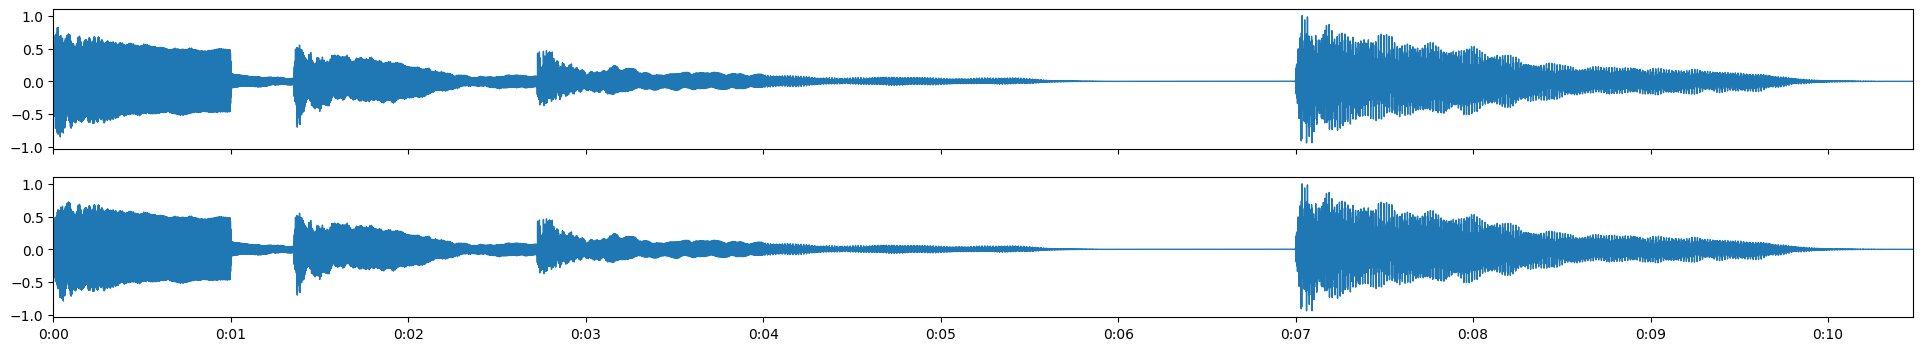

In [10]:
n = Note("7c", 1)

samp = cl.asSample()
session = playSession()

with render(endtime=20) as r:
    gr1 = n.play(fade=0)
    gr2 = cl.play(position=0)
    gr2.automate('speed', (0, 1, 2, 0.8, 3, 1))
    gr2.set(speed=0.5, delay=4)
    sampsynth = r.playSample((samp.samples, samp.sr), pos=1)
    sampsynth.automate('kspeed', (0, 1, 2, 0.8, 3, 1))
    sampsynth.set(speed=0.5, delay=4)
    
r

## Test sample rate

In [11]:
from maelzel.core import *
cl = Clip("../snd/voiceover-fragment-48k.flac")

mnOut size: 24
m_pitchTrack size: 24


LibXtract compiled with ooura FFT


Clip(source=../snd/voiceover-fragment-48k.flac, numChannels=1, sr=48000, dur=487392980376049/35184372088832, sourcedursecs=8.926secs)
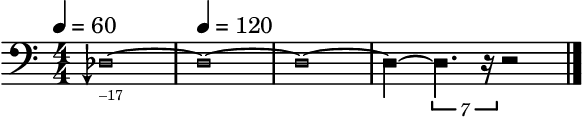

In [12]:
cl

In [13]:
cl.play()

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(𝍪 preset:_clip_diskin=501.0007 start=160.675 dur=8.926 p4=0 kpos=1 kgain=21 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=../snd/voiceover-fragment-48k.flac ipath=-1 isndfilechan=1 kspeed=0 iskip=0 iwrap=4 iwinsize=0 p21=48.8273 …)

In [14]:
s = Sample("../snd/voiceover-fragment-48k.flac")
s = s.getChannel(0, contiguous=True)
cl2 = Clip((s.samples, s.sr))


mnOut size: 24
m_pitchTrack size: 24


In [15]:
cl2.play()

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(𝍪 preset:_playtable=504.0002 start=166.771 dur=8.926 p4=0 kpos=1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=106 isndtab=0 istart=1 kspeed=-1 ixfade=0 p19=48.8273 p20=1 p21=8.92627 …)

In [16]:
s3 = Sample("../snd/voiceover-fragment-96k.flac")
s3 = s3.getChannel(0, contiguous=True)
cl3 = Clip((s3.samples, s3.sr))
cl3.play()


mnOut size: 24
m_pitchTrack size: 24


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=1)
    Synth(𝍪 preset:_playtable=504.0003 start=174.027 dur=8.926 p4=0 kpos=1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=107 isndtab=0 istart=1 kspeed=-1 ixfade=0 p19=36.0725 p20=1 p21=8.92627 …)

In [17]:
s3.firstPitch()

mnOut size: 24
m_pitchTrack size: 24


(0.138697917, 61.73633575439453)

In [21]:
s3.play()

Button(description='Stop', style=ButtonStyle())

Output()